In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv('train.csv',nrows=100000,header=None)

In [7]:
df.head()

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [8]:
df.columns = ['polarity','title','text']
df.drop(['title'], axis=1,inplace=True)

In [9]:
df.head(10)

,polarity,text
0,2,This sound track was beautiful! It paints the ...
1,2,I'm reading a lot of reviews saying that this ...
2,2,This soundtrack is my favorite music of all ti...
3,2,I truly like this soundtrack and I enjoy video...
4,2,"If you've played the game, you know how divine..."
5,2,I am quite sure any of you actually taking the...
6,1,"This is a self-published book, and if you want..."
7,2,I loved Whisper of the wicked saints. The stor...
8,2,I just finished reading Whisper of the Wicked ...
9,2,This was a easy to read book that made me want...


In [11]:
(df.polarity.value_counts()/len(df))*100

polarity
2    51.267
1    48.733
Name: count, dtype: float64

<Axes: xlabel='polarity', ylabel='count'>

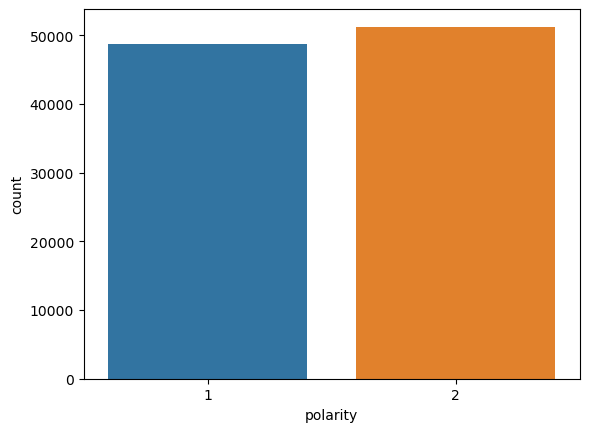

In [12]:
sns.countplot(x='polarity',data=df)

# TEXT PREPROCESSING

In [13]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shahr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# first we will convert text in lowercase and remove links,bracket-text,punctuations and words containing number.
def pre_process_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]|[^a-zA-Z\s]+|\w*\d\w*', '', text)
    # 'https?://\S+' - urls
    # 'www\.\S+'     - urls 
    # '\[\.*?\]'     - bracket-text
    # '[^a-zA-Z\s]+' - not a letter
    # '\w*\d\w*'     - least one character
    
    
    # In same function we remove stop words also
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    return ' '.join(filtered_words).strip()
    
    

In [15]:
df['preprocessed_text'] = df.text.apply(pre_process_text)

In [16]:
df.head()

,polarity,text,preprocessed_text
0,2,This sound track was beautiful! It paints the ...,sound track beautiful paints senery mind well ...
1,2,I'm reading a lot of reviews saying that this ...,im reading lot reviews saying best game soundt...
2,2,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense s...
3,2,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music p...
4,2,"If you've played the game, you know how divine...",youve played game know divine music every sing...


In [17]:
# second we perform tokenization and stemmeing 

def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [18]:
def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [19]:
df['stemmed_text'] = df['preprocessed_text'].apply(stem_text)

In [20]:
df.head()

,polarity,text,preprocessed_text,stemmed_text
0,2,This sound track was beautiful! It paints the ...,sound track beautiful paints senery mind well ...,sound track beauti paint seneri mind well woul...
1,2,I'm reading a lot of reviews saying that this ...,im reading lot reviews saying best game soundt...,im read lot review say best game soundtrack fi...
2,2,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense s...,soundtrack favorit music time hand intens sad ...
3,2,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music p...,truli like soundtrack enjoy video game music p...
4,2,"If you've played the game, you know how divine...",youve played game know divine music every sing...,youv play game know divin music everi singl so...


# EDA

In [21]:
count = Counter(' '.join(df['stemmed_text']).split())

words = pd.DataFrame(count.items(),columns=['Words','Frequency'])

words = words.sort_values('Frequency',ascending = False).reset_index(drop=True)

words['rank'] = words.index + 1
words = words[['rank','Words','Frequency']]


In [22]:
words.head()

,rank,Words,Frequency
0,1,book,64008
1,2,one,38635
2,3,like,32537
3,4,movi,31837
4,5,read,30783


In [23]:
from wordcloud import WordCloud

In [24]:
def generate_wordcloud(i):
    cloud = WordCloud(width=2000,height=1000,max_words=1000,background_color='black',colormap='coolwarm')
    wordcloud = cloud.generate(i)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

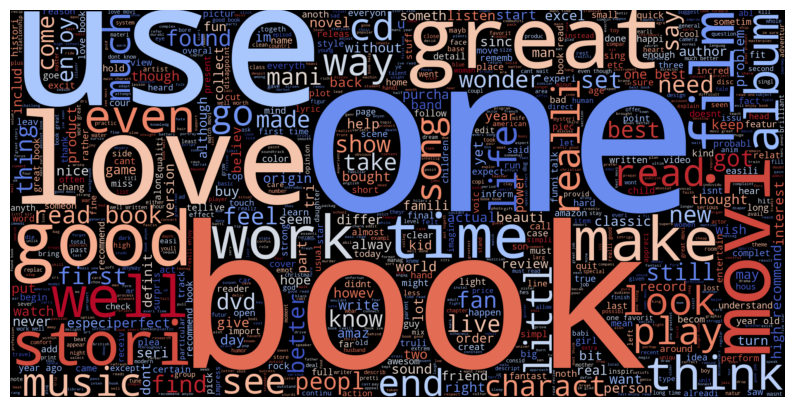

In [25]:
positive_words = " ".join(df[df['polarity']==2]['stemmed_text'])
generate_wordcloud(positive_words)

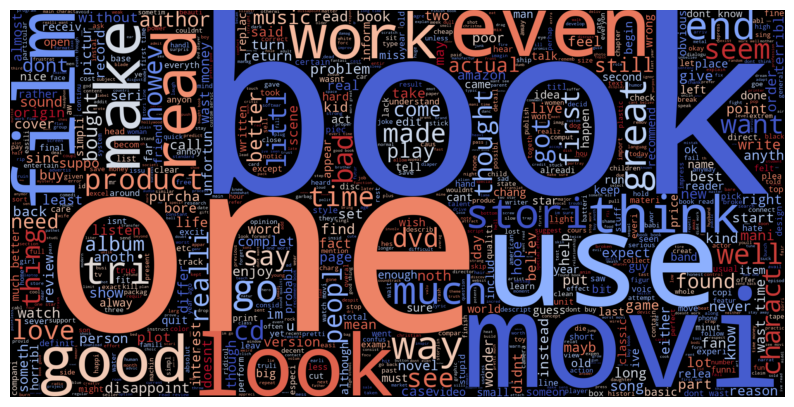

In [26]:
negative_words = " ".join(df[df['polarity']==1]['stemmed_text'])
generate_wordcloud(negative_words)

## TFIDF feature extraction

In [27]:
X = df.stemmed_text
y = df.polarity

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tfidf = TfidfVectorizer(stop_words='english')

In [32]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [33]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# CREATING MODELS

In [34]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
x_train,x_test,Y_train,Y_test = train_test_split(X,y_encoded,random_state=42,test_size=0.2)
xgb_classifier = xgb.XGBClassifier()
x_train_vector = tfidf.fit_transform(x_train)
x_test_vector = tfidf.transform(x_test)

xgb_classifier.fit(x_train_vector,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
#y_pred_xgb = xgb_classifier.predict(x_test_vector)
#acc_xgb = accuracy_score(Y_test,y_pred_xgb)
#print('Accuracy:- ',acc_xgb)
#print(classification_report(Y_test,y_pred_xgb))

#cm = confusion_matrix(Y_test, y_pred_xgb)
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
#plt.show()

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [37]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_tfidf,y_train)

LogisticRegression()

In [38]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [39]:
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train_tfidf,y_train)

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
def report(model):
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test,preds)
    print('accuracy:- ',acc)
    print(classification_report(y_test,preds))
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

accuracy:-  0.81595
              precision    recall  f1-score   support

           1       0.81      0.80      0.81      9602
           2       0.82      0.83      0.82     10398

    accuracy                           0.82     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000



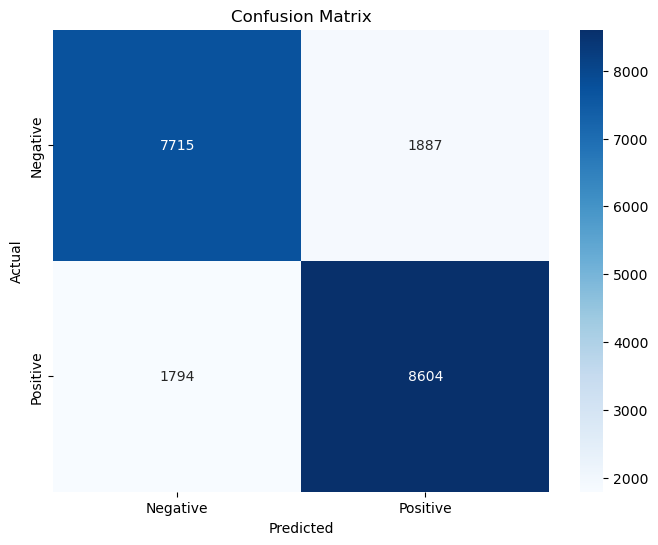

In [42]:
report(nb)

accuracy:-  0.84835
              precision    recall  f1-score   support

           1       0.85      0.83      0.84      9602
           2       0.85      0.86      0.86     10398

    accuracy                           0.85     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.85      0.85      0.85     20000



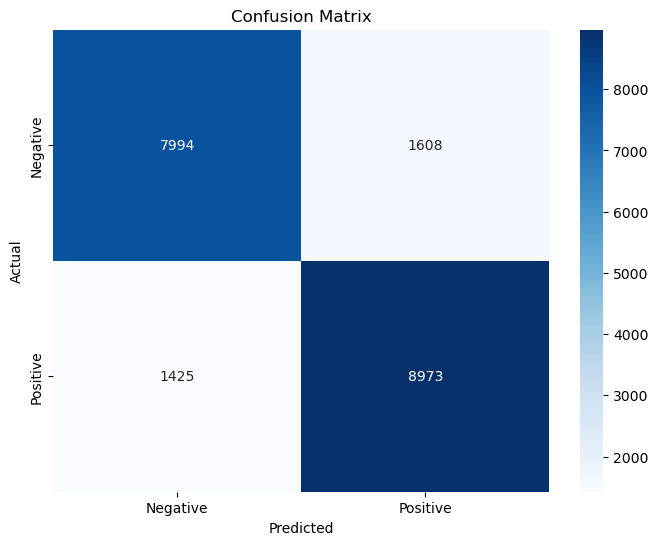

In [43]:
report(log_model)

accuracy:-  0.8394
              precision    recall  f1-score   support

           1       0.84      0.83      0.83      9602
           2       0.84      0.85      0.85     10398

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



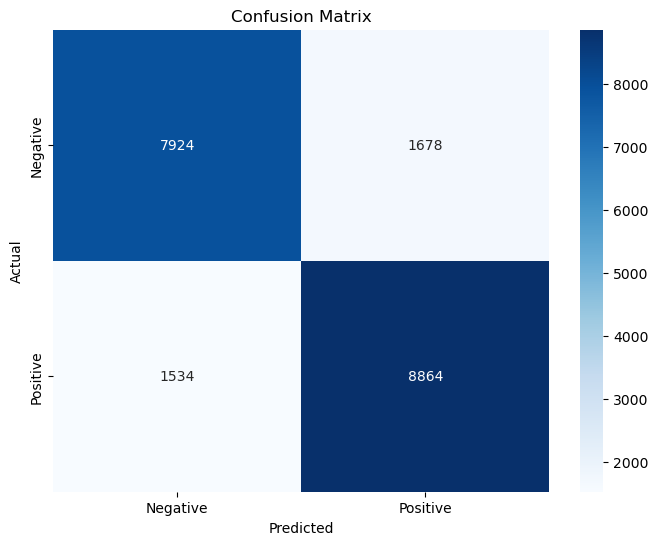

In [44]:
report(linear_svc)

accuracy:-  0.84835
              precision    recall  f1-score   support

           1       0.85      0.83      0.84      9602
           2       0.85      0.86      0.86     10398

    accuracy                           0.85     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.85      0.85      0.85     20000



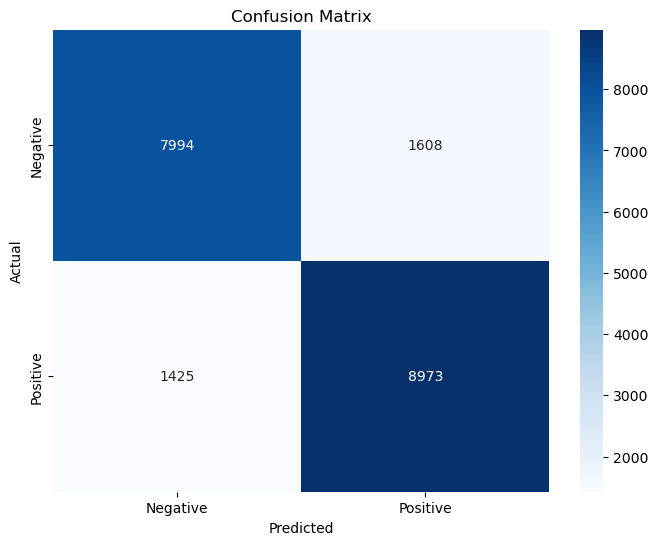

In [45]:
report(log_model)

In [46]:
from sklearn.pipeline import Pipeline

In [47]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),
               ('svc',LinearSVC())])

In [48]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [49]:
pipe.predict(['good flight'])

array([2], dtype=int64)

In [50]:
pipe.predict(['today i was not in a good mood'])

array([2], dtype=int64)

In [51]:
pipe.predict(['very bad'])

array([1], dtype=int64)

In [52]:
pipe.predict(['he did dirty today'])

array([1], dtype=int64)

In [53]:
pipe.predict(['ok flight'])

array([1], dtype=int64)

In [54]:
accuracy_dic = {
    
    'model':['Naive_bayes','Logistic Regression','Linear SVC','Random Forest'],
    'accuracy':[82,85,84,83]
}

In [55]:
acc_df = pd.DataFrame(accuracy_dic)

In [56]:
acc_df

,model,accuracy
0,Naive_bayes,82
1,Logistic Regression,85
2,Linear SVC,84
3,Random Forest,83


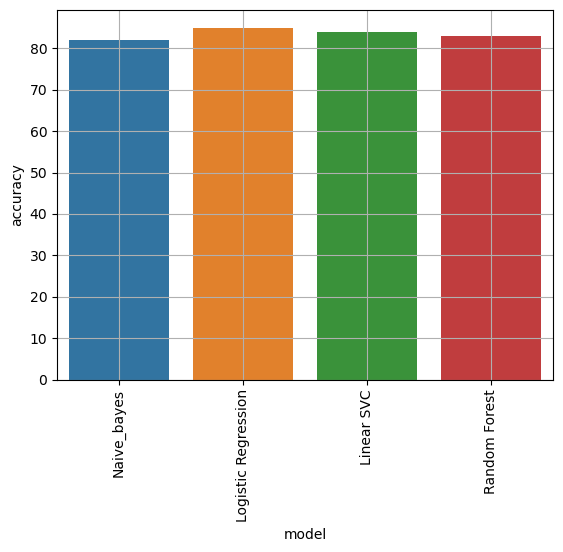

In [57]:
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.xticks(rotation=90)  
plt.grid(True)

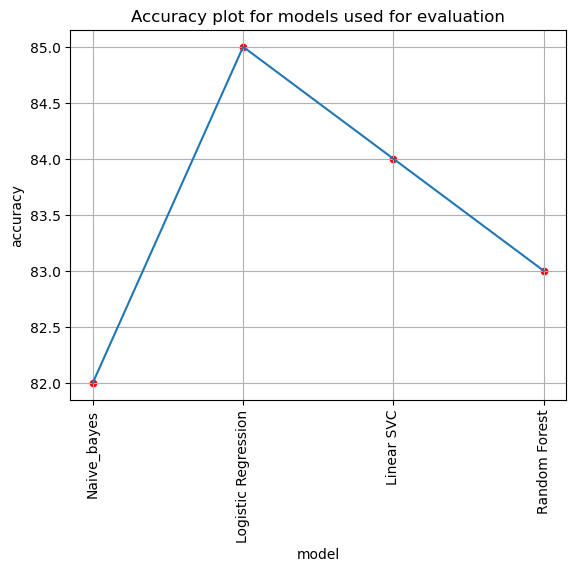

In [58]:
sns.scatterplot(x='model',y='accuracy',data=acc_df,color='red')
sns.lineplot(x='model',y='accuracy',data=acc_df)
plt.title('Accuracy plot for models used for evaluation')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [59]:
test_df = pd.read_csv('test.csv',header=None)

In [60]:
test_df.columns = ['polarity','title','text']

In [61]:
test_df.drop('title',axis=1,inplace=True)

In [62]:
test_df

,polarity,text
0,2,My lovely Pat has one of the GREAT voices of h...
1,2,Despite the fact that I have only played a sma...
2,1,I bought this charger in Jul 2003 and it worke...
3,2,Check out Maha Energy's website. Their Powerex...
4,2,Reviewed quite a bit of the combo players and ...
...,...,...
399995,1,We bought this Thomas for our son who is a hug...
399996,1,My son recieved this as a birthday gift 2 mont...
399997,1,"I bought this toy for my son who loves the ""Th..."
399998,2,This is a compilation of a wide range of Mitfo...


In [63]:
test = test_df['text']

In [64]:
pred = pipe.predict(test)

In [65]:
pred

array([2, 2, 1, ..., 1, 2, 2], dtype=int64)

In [88]:
test_acc = accuracy_score(pred,test_df.polarity)

In [89]:
test_acc

0.6928275

In [68]:
pipe2 = Pipeline([('tfidf',TfidfVectorizer()),
               ('log',LogisticRegression())])

In [69]:
pipe2.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('log', LogisticRegression())])

In [70]:
log_pipe_pred = pipe2.predict(test)

In [71]:
log_test_acc = accuracy_score(log_pipe_pred,test_df.polarity)

In [72]:
log_test_acc

0.7749075

In [73]:
pipe3 = Pipeline([('tfidf',TfidfVectorizer()),
               ('nb',MultinomialNB())])

In [74]:
pipe3.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [75]:
nb_pipe_pred = pipe3.predict(test)

In [76]:
nb_test_acc = accuracy_score(nb_pipe_pred,test_df.polarity)

In [77]:
nb_test_acc

0.6581025

In [78]:
#from xgboost import XGBClassifier
#test_df['label'] = test_df['polarity'].map({1: 0, 2: 1})
#pipe5 = Pipeline([
#    ('tfidf', TfidfVectorizer(max_features=5000,stop_words='english')), 
#    ('xgb', XGBClassifier(objective='binary:logistic'))
#])

In [79]:
#pipe5.fit(X,y)

In [80]:
test_acc = {
    'model':['Naive_bayes','Logistic Regression','Linear SVC','Random Forest'],
    'accuracy':[65.8,77.4,69.3,75.3]
}

In [81]:
test_acc_df = pd.DataFrame(test_acc)

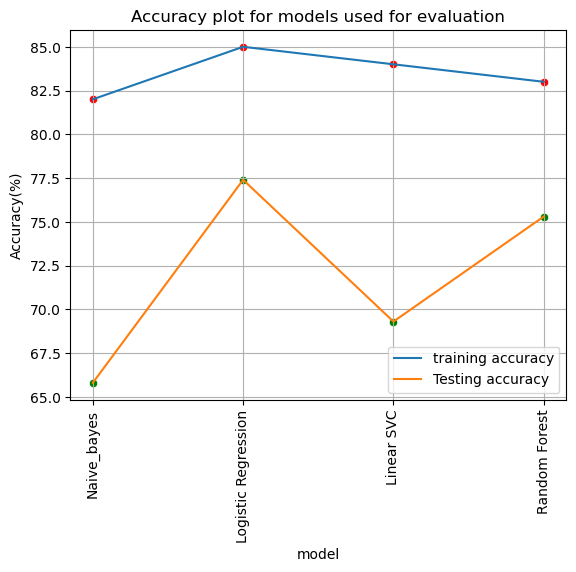

In [82]:
sns.scatterplot(x='model',y='accuracy',data=acc_df,color='red')
sns.lineplot(x='model',y='accuracy',data=acc_df,label='training accuracy')
sns.scatterplot(x='model',y='accuracy',data=test_acc_df,color='green')
sns.lineplot(x='model',y='accuracy',data=test_acc_df,label='Testing accuracy')
plt.title('Accuracy plot for models used for evaluation')
plt.grid(True)
plt.ylabel('Accuracy(%)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [83]:
#help(MultinomialNB())

In [86]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])
parameters = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': (1e-2, 1e-3)
}
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train,y_train)
print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'nb__alpha': 0.01, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 2)}
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.82      0.81      9602
           2       0.83      0.81      0.82     10398

    accuracy                           0.82     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000



In [90]:
pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])
parameters = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(pipeline2, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


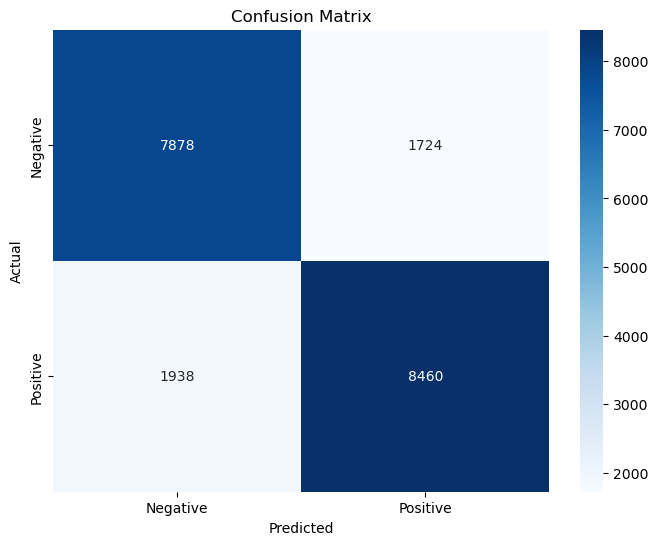

In [ ]:
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle
with open('C:\\Users\\shahr\\OneDrive\\Desktop\\all\\model.pkl', 'wb') as model_file:
    pickle.dump(log_model, model_file)

In [ ]:
with open('C:\\Users\\shahr\\OneDrive\\Desktop\\all\\vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

accuracy:-  0.6887
              precision    recall  f1-score   support

           1       0.69      0.63      0.66      9602
           2       0.68      0.74      0.71     10398

    accuracy                           0.69     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.69      0.69      0.69     20000



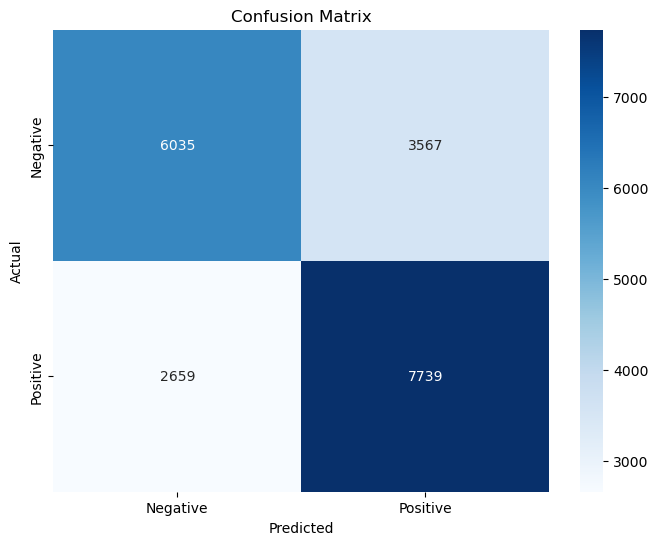

In [ ]:
report(knn)